In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv(r"D:\Croma\Croma\Python\self-Project\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali sales Data.csv",encoding='unicode_escape')

In [12]:
data.shape

(11251, 15)

In [14]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Cleaning the data

In [28]:
# check blank coulmn or cell 
pd.isnull(data).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [25]:
# delete useless column
data.drop(['Status','unnamed1'],axis=1,inplace = True)

In [27]:
data.dropna(inplace=True)

In [29]:
# change datatype
data['Amount']= data['Amount'].astype('int')

In [30]:
data['Amount'].dtypes

dtype('int32')

In [34]:
data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [32]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [41]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [42]:
data.rename(columns ={'Marital_Status':'Married'}, inplace=True)

In [44]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Married', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

## Exploratory data Analysis

## Gender

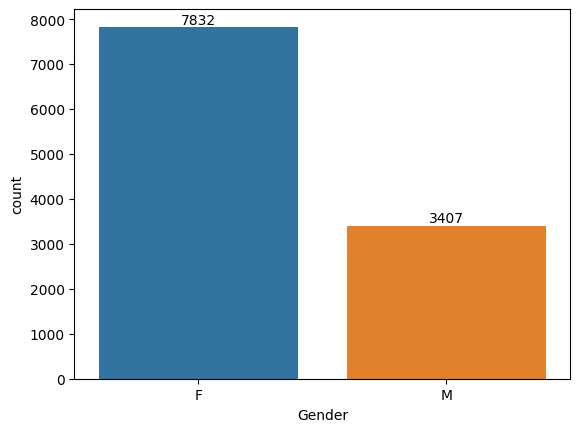

In [48]:

ax = sns.countplot(x='Gender', data= data)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

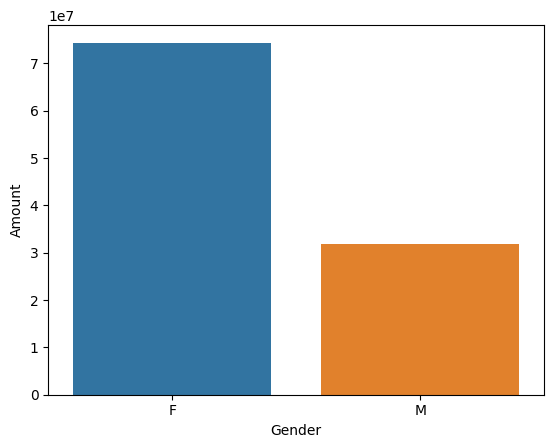

In [64]:
sales_gen= data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)


Females was do more shopping as compare to male

## Age

<Axes: xlabel='Age Group', ylabel='Amount'>

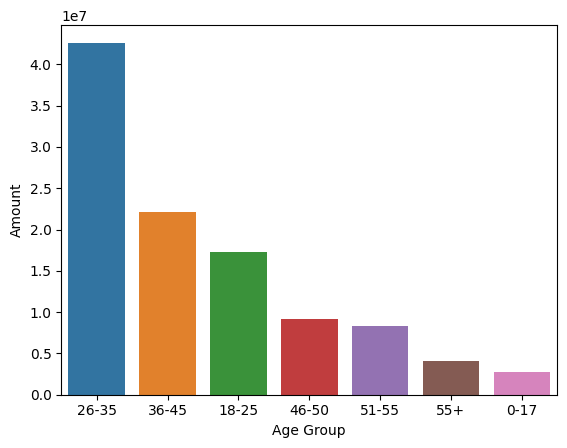

In [92]:
sales_age=data.groupby('Age Group', as_index=False )['Amount'].sum().sort_values(by='Amount',ascending=False)
sns. barplot(x='Age Group',y='Amount', data=sales_age)

<Axes: xlabel='Age Group', ylabel='count'>

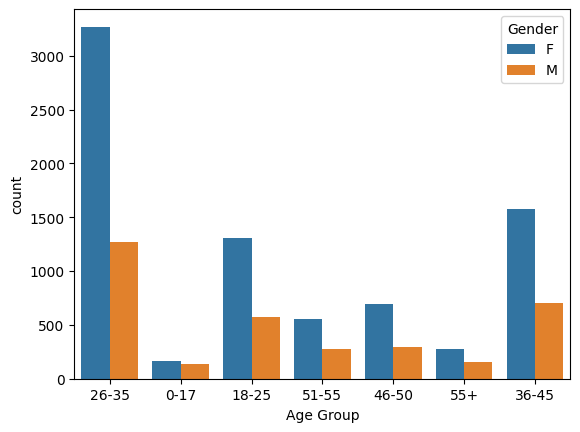

In [88]:
sns.countplot(data=data,x='Age Group',hue='Gender')

most of buyers are of age group between 26-35yr female

## State

In [69]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Married', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

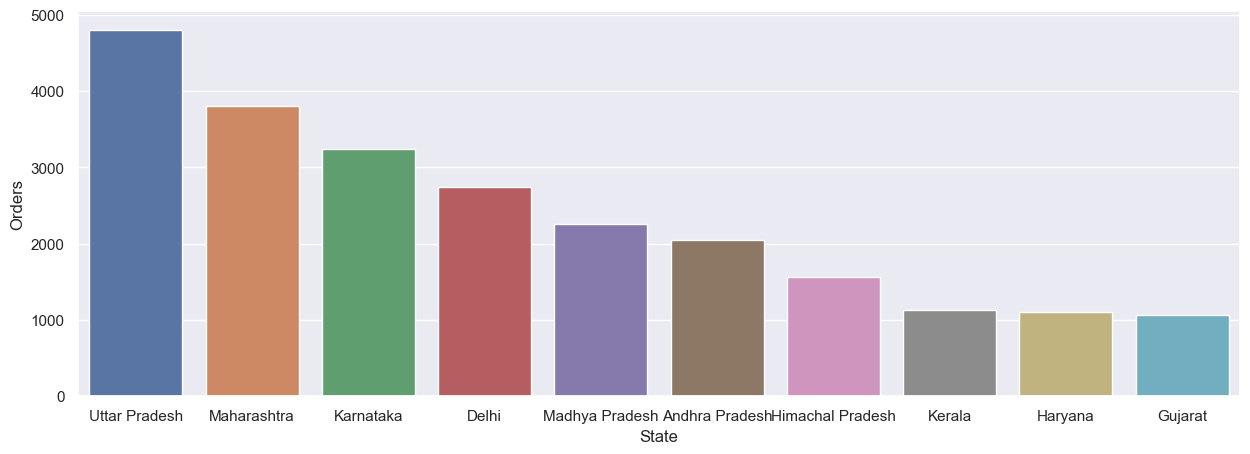

In [95]:
sales_state=data.groupby('State', as_index=False )['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='State',y='Orders')


<Axes: xlabel='State', ylabel='Amount'>

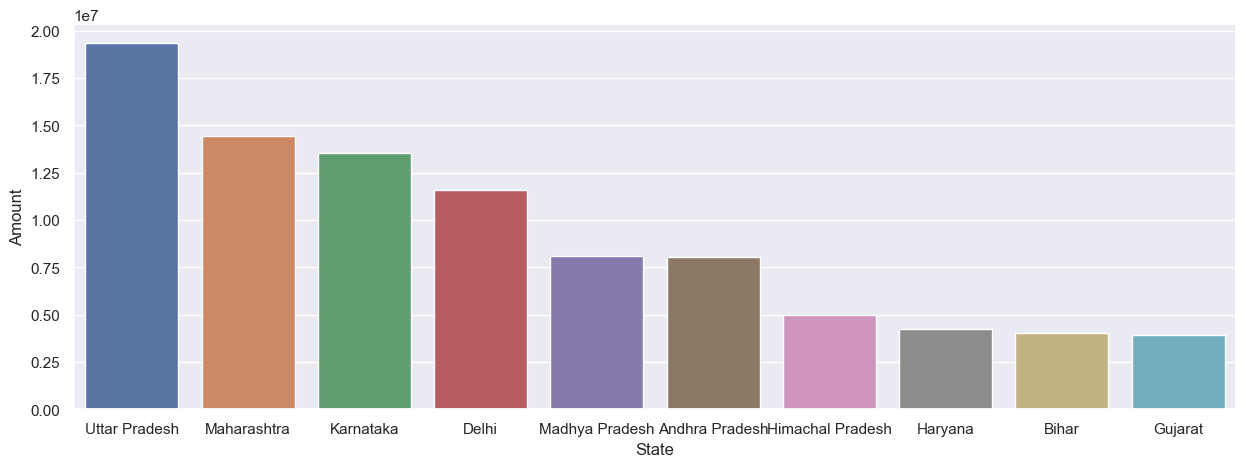

In [110]:
sales_state=data.groupby('State', as_index=False )['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='State',y='Amount')

#### from above graph we can see that most of the orders & total sales/amount ar from up,maharastra and karnataka respectively.

### zone

<Axes: xlabel='Zone', ylabel='Amount'>

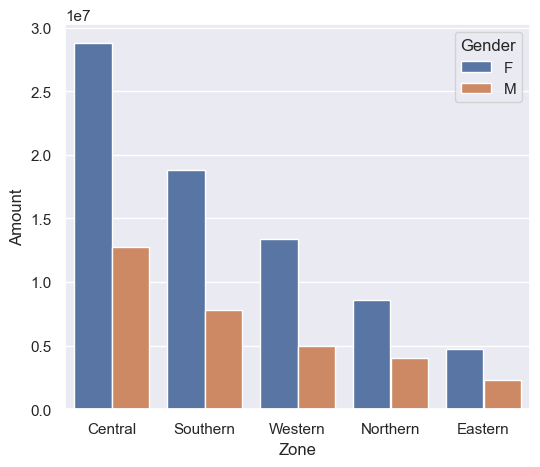

In [115]:
sales_zone=data.groupby(['Zone','Gender'], as_index=False )['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_zone,x='Zone',y='Amount',hue="Gender")

#### according to garph central region female was do most shopping as compare to other

## Maritual Status

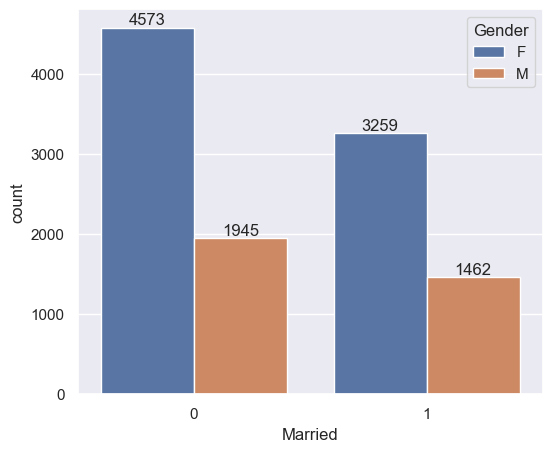

In [118]:
ax=sns.countplot(data=data,x='Married', hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Married', ylabel='Amount'>

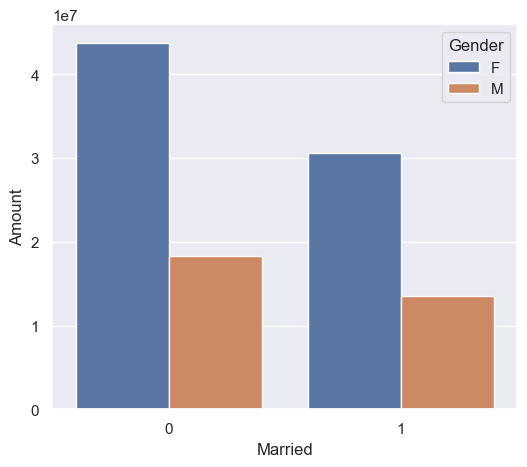

In [109]:
sales_Maritual=data.groupby(['Married','Gender'], as_index=False )['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_Maritual,x='Married',y='Amount',hue="Gender")

*from above graph we can see that most of the buyer are married (women ) and they have high purchaing power* 

## Occuption

In [119]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


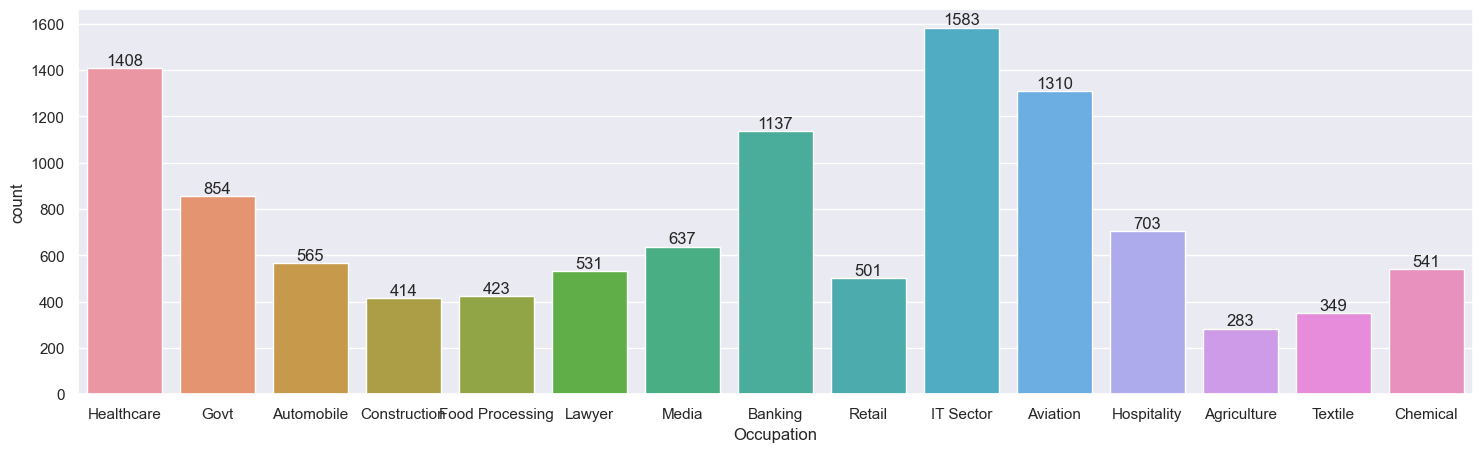

In [124]:
sns.set(rc={'figure.figsize':(18,5)})
ax=sns.countplot(data=data,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

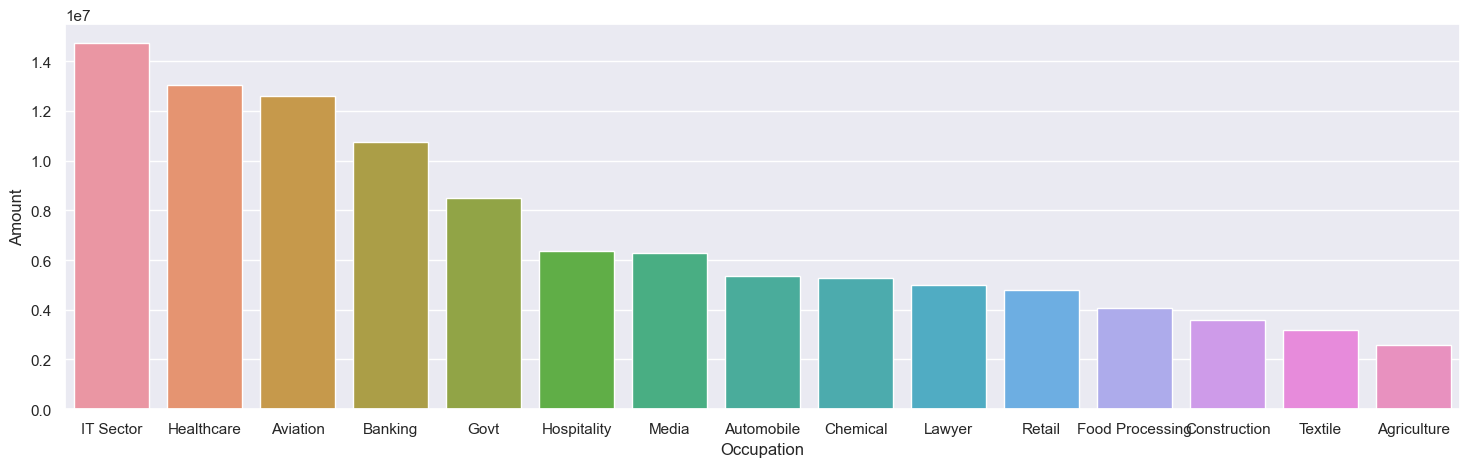

In [129]:
sales_Occup=data.groupby(['Occupation'], as_index=False )['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data=sales_Occup,x='Occupation',y='Amount')

*we can see that most of the buyers are working in IT,AViation and Healthcare*

## Product Categories

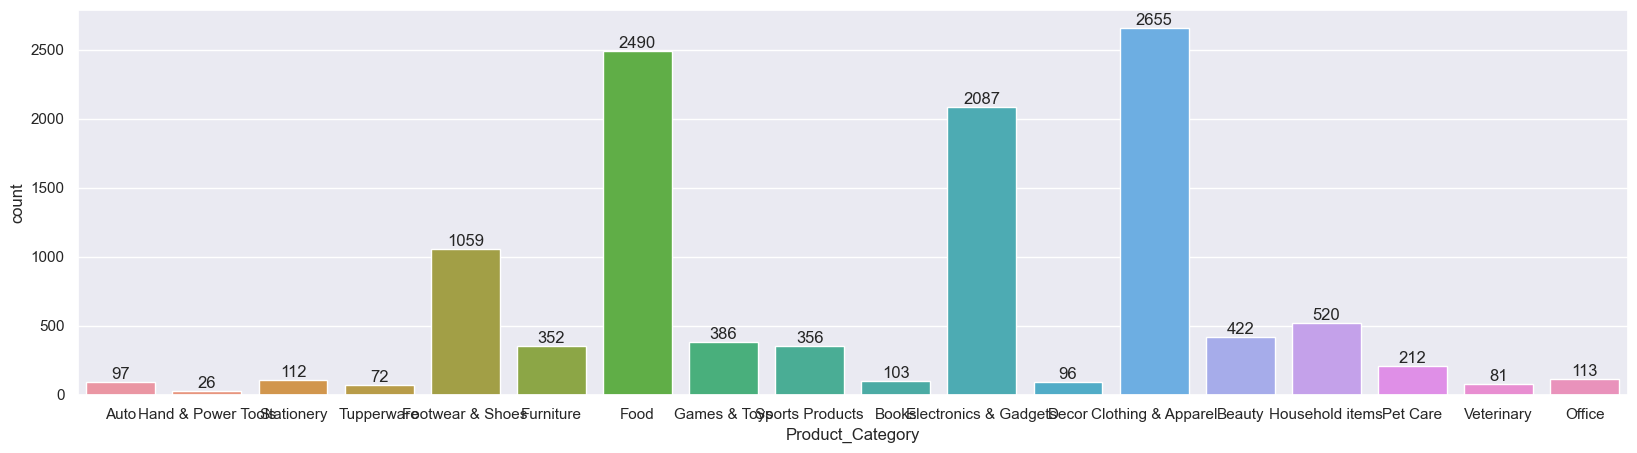

In [132]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=data,x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

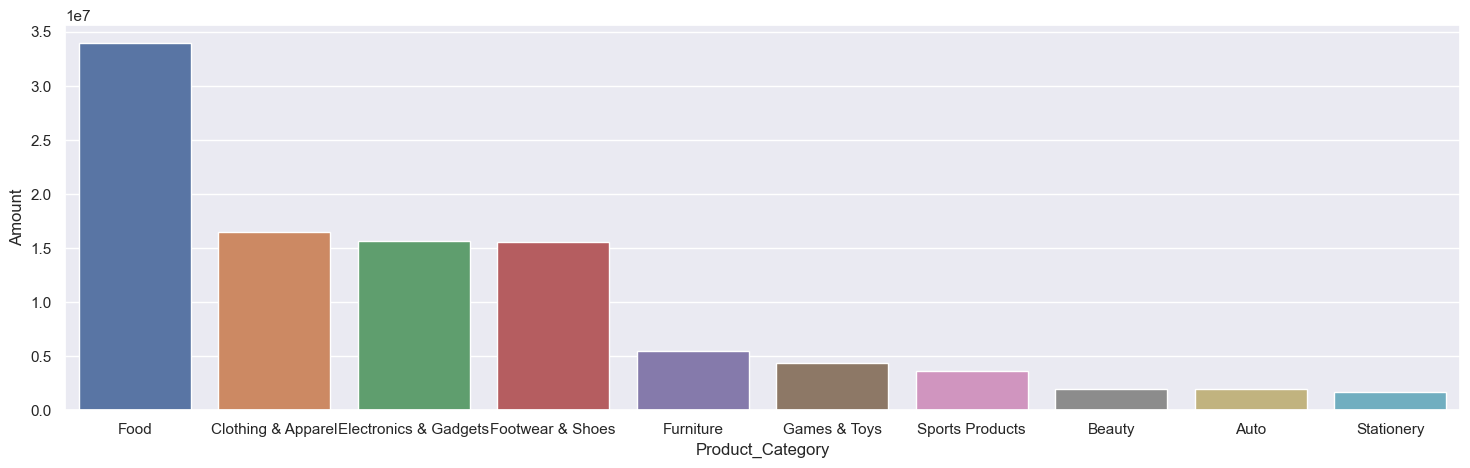

In [134]:
sales_pc=data.groupby(['Product_Category'], as_index=False )['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data=sales_pc,x='Product_Category',y='Amount')

<Axes: xlabel='Product_ID', ylabel='Orders'>

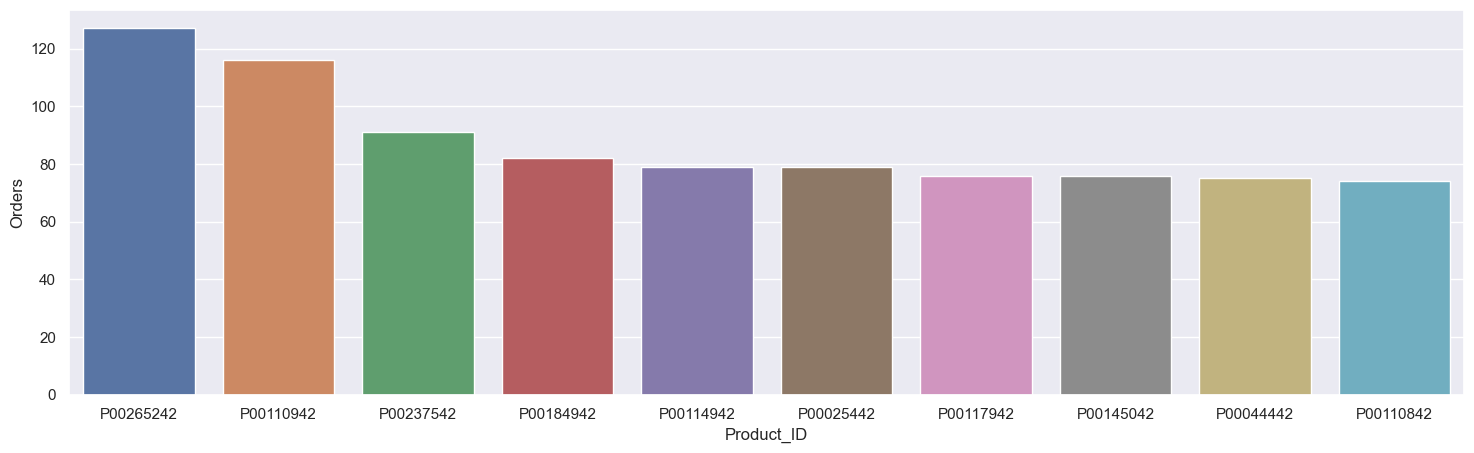

In [138]:
sales_pc=data.groupby(['Product_ID'], as_index=False )['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data=sales_pc,x='Product_ID',y='Orders')

 *most sold products are from Food,Clothing,and Electronic*

<Axes: xlabel='Product_ID'>

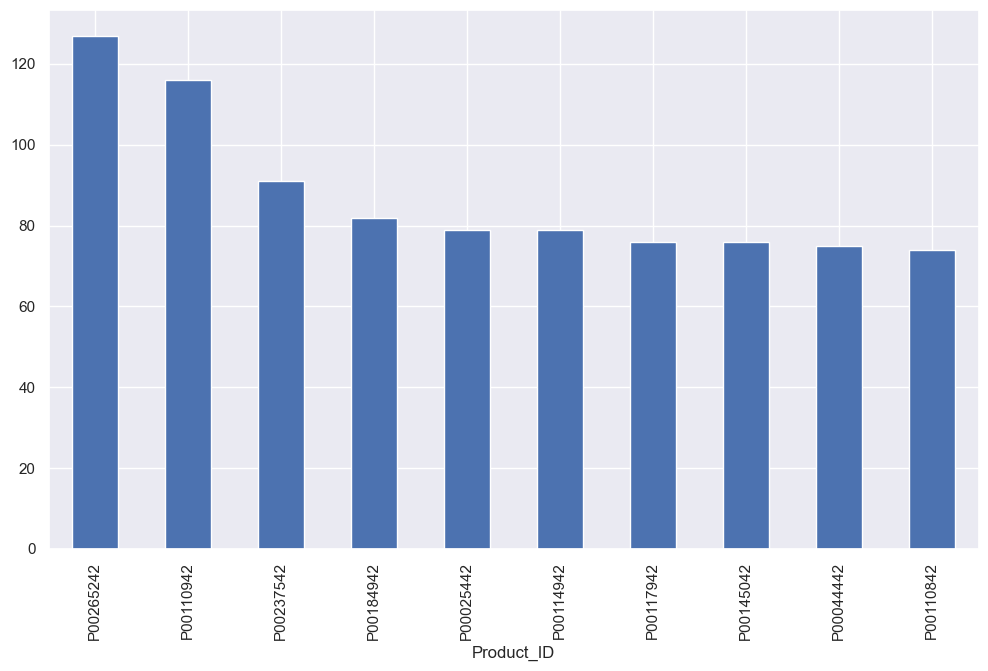

In [141]:
## top 10 most sold products(same thing as above)

fig1 ,ax1 = plt.subplots(figsize=(12,7))
data.groupby("Product_ID")['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# Conclusion:-

* Married women age group 26-35yrs from UP,Maharstra and Karnataka working in It,Healthcare and Aviation are more likely to buy products from Food Clothing and Electronics Category 